## Pandas Exercise
Credit:
- [source1](https://www.machinelearningplus.com/python/101-pandas-exercises-python/)
- [source2](https://github.com/ajcr/100-pandas-puzzles/blob/master/100-pandas-puzzles-with-solutions.ipynb)

### 1.Create Series from dict /assign name

- pandas.Series(data=None, **index**=None, dtype=None, **name**=None, copy=False)
- pandas.DataFrame(data=None, **index**=None, **columns**=None, dtype=None, copy=False)
- pandas.Index(data, name)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [511]:
# input
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))

In [5]:
# output1
pd.Series(mydict).head()

a    0
b    1
c    2
d    4
e    3
dtype: int64

In [23]:
# output2
pd.Series(myarr, index=mylist, name='order').head()

a    0
b    1
c    2
e    3
d    4
Name: order, dtype: int64

In [514]:
pd.DataFrame({'col1': myarr}, index=pd.Index(mylist, name='order')).head()

,col1
order,
a,0
b,1
c,2
e,3
d,4


### 2.convert the index of a sries into a column of a df

DataFrame.reset_index(level=None, **drop**=False, inplace=False, col_level=0, col_fill='')

In [9]:
# input
ser = pd.Series(mydict)

In [13]:
# output
ser.reset_index().head()

,index,0
0,a,0
1,b,1
2,c,2
3,d,4
4,e,3


### 3.combine series to form df
[concat](https://pandas.pydata.org/pandas-docs/stable/merging.html)
- pandas.concat(objs(seq), **axis=0**, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
    - axis: ({0/’index’, 1/’columns’}, default 0)
        - if two data frames have identical columns: append in rows
        - if two data frames have overlapping columns, concat in columns, with join set to be 'outer' or 'inner'. If 'outer', columns outside the intersection will be filled with NaN values.
    - join: 'outer' for union and 'inner' for intersection, default as 'outer'
    - keys: 
        - sequence, construct hierarchical index using the passed keys as the outermost level (multi-index)
        - A fairly common use of the keys argument is to override the column names when creating a new DataFrame based on existing Series.
    - join_axes: specific indexes to use for the other n-1 axies instead of performing inner/outer set logit. (join_axes=[df1.index])

- DataFrame.append(other, ignore_index=False, verify_integrity=False, sort=None)
    - **Append rows** of other to the end of this frame, returning a new object. Columns not in this frame are added as new columns.
- DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
    - **Join columns** with other DataFrame either on index or on a key column. Efficiently Join multiple DataFrame objects by index at once by passing a list.

In [14]:
# input
ser1 = pd.Series(mylist)
ser2 = pd.Series(myarr)

In [15]:
# output1
pd.DataFrame({'col1': ser1, 'col2': ser2}).head()

,col1,col2
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


In [16]:
# output2
pd.concat([ser1, ser2], axis=1).head()

,0,1
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


In [95]:
### axis=0: stack by row, same as append
assert pd.concat([ser1, ser2], axis=0).equals(ser1.append(ser2))

- keys : sequence, default None
    - If multiple levels passed, should contain tuples. Construct hierarchical index using the passed keys as the outermost level

In [35]:
pd.concat([ser1, ser2], keys=['s1', 's2'])

s1  0    1
    1    2
    2    3
    3    4
    4    5
s2  0    4
    1    5
    2    6
    3    7
    4    8
dtype: int64

### 4. get the items of series A not present in series B

In [24]:
# input 
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

In [25]:
# output
ser1[~ser1.isin(ser2)]

0    1
1    2
2    3
dtype: int64

### 5. get the items not common to both series A and series B

In [26]:
# output
ser1[~ser1.isin(ser2)].append(ser2[~ser2.isin(ser1)])

0    1
1    2
2    3
2    6
3    7
4    8
dtype: int64

### 5. get the minimum, 25th percentile, median, 75th, and maximum
numpy.percentile(a, **q**, axis=None)
-  q: (float in range of [0,100] (or sequence of floats))

In [27]:
# input
np.random.RandomState(100)
ser_rand = pd.Series(np.random.normal(10, 5, 25))

In [29]:
# output
ser_rand.describe()

count    25.000000
mean      9.077290
std       4.287819
min       0.293734
25%       5.765617
50%       9.642595
75%      12.311676
max      16.386937
dtype: float64

In [30]:
np.percentile(ser_rand, q=[0, 25, 50, 75, 100])

array([  0.29373368,   5.76561679,   9.64259454,  12.31167644,  16.38693701])

### 6.get frequency counts of unique items of a series
- numpy.random.randint(low, high=None, size=None, dtype='l')
    - size : int or tuple of ints, optional (output shape)
- numpy.take(a, indices)
    - indices could be multi-dimensional
- numpy.random.choice(a, size=None, replace=True, p=None)
    - a: int or array
    - p: probability
- Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
    - bins: Rather than count values, group them into half-open bins, a convenience for pd.cut, only works with numeric data

In [32]:
# input
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))

#output
ser.value_counts()

e    6
a    6
c    5
h    4
b    4
d    3
f    1
g    1
dtype: int64

In [91]:
ser2 = pd.Series(np.random.choice(10, 30))
ser2.value_counts(bins = [0, 3, 6, 10], normalize=True)

(-0.001, 3.0]    0.433333
(6.0, 10.0]      0.400000
(3.0, 6.0]       0.166667
dtype: float64

In [92]:
pd.cut(ser2, [-0.1, 3, 6, 10]).value_counts(normalize=True)

(-0.1, 3.0]    0.433333
(6.0, 10.0]    0.400000
(3.0, 6.0]     0.166667
dtype: float64

### 7. keep top 2 and replace others as 'other'

In [46]:
# input
np.random.RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))

In [47]:
ser[~ser.isin(ser.value_counts().index[:2])] = 'other'

In [48]:
ser

0         1
1         4
2     other
3         4
4     other
5         4
6     other
7     other
8         1
9         1
10    other
11        1
dtype: object

### 8. bin a numeric series to 10 groups of equal size?
- pandas.qcut(x, q, labels=None, retbins=False, precision=3)
Quantile-based discretization function. Discretize variable into equal-sized buckets based on rank or based on sample quantiles. For example 1000 values for 10 quantiles would produce a Categorical object indicating quantile membership for each data point.

In [49]:
# input
ser = pd.Series(np.random.random(20))

In [68]:
# pd.qcut(ser, q = np.linspace(0,1,11), 
#         labels=[str(i)+'th' if i > 3 
#                 else str(i) + 'rd' if i == 3 
#                 else str(i) + 'nd' if i == 2
#                 else str(i) + 'st' 
#                 for i in range(1, 11)])
pd.qcut(ser, q = np.linspace(0,1,11), 
        labels=['1st', '2nd', '3rd']+[str(i) + 'th' for i in range(4, 11)])

0      1st
1      1st
2      7th
3      4th
4      8th
5      6th
6      6th
7      4th
8      2nd
9      5th
10     9th
11     5th
12     3rd
13     8th
14     2nd
15     9th
16    10th
17     3rd
18    10th
19     7th
dtype: category
Categories (10, object): [1st < 2nd < 3rd < 4th ... 7th < 8th < 9th < 10th]

### 9.convert a series to df of given shape
- Series.values: Return Series as ndarray or ndarray-like depending on the dtype

In [77]:
# input 
ser = pd.Series(np.random.randint(1, 10, 35))
# output 
pd.DataFrame(ser.values.reshape(7,5))

,0,1,2,3,4
0,8,4,8,8,6
1,4,8,5,6,9
2,7,8,7,7,7
3,4,9,6,9,5
4,4,9,2,5,7
5,3,5,4,1,2
6,5,5,9,7,6


### 10. find the positions of numbers that are multiples of 3 from a series
- np.argwhere(a): return non-zero index

~~~
>>> x = np.arange(6).reshape(2,3)

>>> x

array([[0, 1, 2],
       [3, 4, 5]])
       
>>> np.argwhere(x>1)

array([[0, 2],
       [1, 0],
       [1, 1],
       [1, 2]])
~~~

- np.where(condition, x, y): Return elements, either from x or y, depending on condition.
    - when x, y not given it works same as np.argwhere()
~~~
[xv if c else yv for (c,xv,yv) in zip(condition,x,y)]
~~~

In [113]:
# input
ser = pd.Series(np.random.randint(1, 10, 7))
print(ser)

0    7
1    7
2    6
3    3
4    2
5    3
6    9
dtype: int64


In [114]:
# output
ser[ser%3==0].index

Int64Index([2, 3, 5, 6], dtype='int64')

In [115]:
# output2
np.argwhere(ser%3==0)

array([[2],
       [3],
       [5],
       [6]])

In [118]:
np.where(ser%3==0)

(array([2, 3, 5, 6]),)

In [121]:
np.where(ser%3==0, np.ones(7), np.zeros(7))

array([ 0.,  0.,  1.,  1.,  0.,  1.,  1.])

### 11.extract at given positions
Series.take(indices, axis=0, convert=None, is_copy=True):
Return the elements in the given **positional** indices along an axis.

In [80]:
# Input
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

# Solution
ser.take(pos)

0     a
4     e
8     i
14    o
20    u
dtype: object

In [83]:
ser.iloc[pos]

0     a
4     e
8     i
14    o
20    u
dtype: object

### 12. get the positions of items of series A in another series B?
- Index.get_loc(key, method=None, tolerance=None)
    - return: **int** if unique index, **slice** if monotonic index, else **mask**

In [98]:
# Input
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13])
# output
ser1[ser1.isin(ser2)].index

Int64Index([0, 4, 5, 8], dtype='int64')

In [126]:
[pd.Index(ser1).get_loc(i) for i in ser2]

[5, 4, 0, 8]

### 13.convert the first character of each element in a seris to uppercase
- str[0], str.get(0)
- str.lower()
- str.upper()
- str.title()
- str.len()
- str.strip(), str.lstrip(), str.rstrip()
- str.split()
    - string to list
    - expand = True, return a data frame with multi-columns
    - n, limit the number of splits
- str.replace()
    - regular expressions: '^.a|dog'
    - case: if case sensitive

In [139]:
# Input
ser = pd.Series(['how', 'to', 'kick', 'ass?'])
# output
ser.str.title()

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [140]:
# output2
ser.apply(lambda x: x.title())

0     How
1      To
2    Kick
3    Ass?
dtype: object

In [131]:
ser.str.replace('o', 't')

0     htw
1      tt
2    kick
3    ass?
dtype: object

In [133]:
ser.str.get(0)

0    h
1    t
2    k
3    a
dtype: object

In [142]:
ser.str.len()

0    3
1    2
2    4
3    4
dtype: int64

### 14.compute difference of differences btw consequtive numbers of a series

In [143]:
#input
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])

#output
ser.diff()

0    NaN
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    6.0
7    8.0
dtype: float64

In [145]:
ser.diff().diff().tolist()

[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]

### 15.convert date-strings to a timeseries

[**Pandas time sereis classes**](https://pandas.pydata.org/pandas-docs/stable/timeseries.html):
- Timestamp:
    - to_datetime: apply on integer, float, string, datetime, list, tuple, 1-d array, Series. 
        - format: '%Y-%b-%d'
    - Timestamp: apply on datetime-like, str, int, float
- DatetimeIndex:
    - pandas.date_range(start=None, end=None, periods=None, freq=None): return a fixed frequency datatime **index**
- Period:
    - Period
- PeriodIndex:
    - period_range, PeriodIndex
    
**Series.dt accessor**:
- year, quarter, month, week (in year), day (in month), dayofyear (in year), weekday (in week), weekday_name (in week), hour, second

**pandas.Timedelta**: represents a duration, the difference btween two dates or times

In [146]:
# input
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

# output
pd.to_datetime(ser)

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

In [150]:
pd.Timestamp(ser[0])

Timestamp('2010-01-01 00:00:00')

In [148]:
pd.date_range('1/1/2011', periods=10, freq='H')

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [153]:
pd.Period('2013-01-01', freq='M')

Period('2013-01', 'M')

In [176]:
pd.to_datetime(ser).dt.weekday_name

0       Friday
1    Wednesday
2     Saturday
3     Thursday
4       Monday
5     Saturday
dtype: object

In [177]:
pd.to_datetime(ser).diff().dt.days

0      NaN
1    397.0
2    395.0
3    397.0
4    396.0
5    397.0
dtype: float64

### 16. convert year-month string to dates corresponding to the 4th day of the month

In [178]:
ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])

In [182]:
pd.to_datetime(ser.apply(lambda x: '04 '+x))

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

### 17.Filter words that contain at least 2 vowels from a series

- apply works on a row / column basis of a DataFrame
    - axis : {0 or ‘index’, 1 or ‘columns’}, default 0, Axis along which the function is applied:
        - 0 or ‘index’: apply function to each column.
        - 1 or ‘columns’: apply function to each row.
- applymap works element-wise on a DataFrame
- map works element-wise on a Series.

In [183]:
ser = pd.Series(['Apple', 'Orange', 'Plan', 'Python', 'Money'])

In [189]:
from collections import Counter
# apply also works
mask = ser.map(lambda x: sum([Counter(x.lower()).get(i, 0) for i in 'aeiou'])>=2)
ser[mask]

0     Apple
1    Orange
4     Money
dtype: object

### 18.filter valid emails from a series


In [188]:
# input 
mails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com'])
pattern ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'

In [194]:
import re
mails[mails.map(lambda x: bool(re.match(pattern, x)))]

1    rameses@egypt.com
2            matt@t.co
3    narendra@modi.com
dtype: object

In [199]:
mails.str.findall(pattern, flags=re.IGNORECASE)

0                     []
1    [rameses@egypt.com]
2            [matt@t.co]
3    [narendra@modi.com]
dtype: object

### 19. find all the local maxima in a numeric series

In [213]:
# input
ser = pd.Series([2, 10, 3, 4, 9, 10, 2, 7, 3])

# output
ser[np.sign(ser.diff()).diff()== -2].index-1

Int64Index([1, 5, 7], dtype='int64')

In [214]:
# output
np.where(np.sign(ser.diff()).diff()== -2)[0]-1

array([1, 5, 7])

### 20.replace missing space in a string with least frequent character

In [221]:
# input
my_str = 'dbc deb abed gadge'

# output
my_str.replace(' ', Counter(my_str).most_common()[-1][0])

'dbccdebcabedcgadge'

In [228]:
ser = pd.Series(list(my_str))
''.join(ser.replace(' ', ser.value_counts().index[-1]))

'dbccdebcabedcgadge'

### 21. create a time series starting from '2000-01-01' and 10 weekends, having random numbers as values.

In [236]:
pd.Series(np.random.randint(1,10,10), 
          index=pd.date_range('2000-01-01', periods=10, freq='W-SAT'))

2000-01-01    7
2000-01-08    9
2000-01-15    9
2000-01-22    9
2000-01-29    1
2000-02-05    4
2000-02-12    6
2000-02-19    8
2000-02-26    3
2000-03-04    4
Freq: W-SAT, dtype: int64

### 22.fill an intermittent time series with value from previous date

In [238]:
ser = pd.Series([1,10,3,np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))
ser

2000-01-01     1.0
2000-01-03    10.0
2000-01-06     3.0
2000-01-08     NaN
dtype: float64

In [243]:
ser.resample('D').ffill().ffill()

2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     3.0
Freq: D, dtype: float64

### 23.compute the autocorrelations of a numeric series
Compute autocorrelations for the first 10 lags of ser. Find out which lag has the largest correlation.
- Series.autocorr(lag=1)

In [245]:
ser = pd.Series(np.arange(20) + np.random.normal(1, 10, 20))

In [254]:
max(enumerate([ser.autocorr(i) for i in range(1, 11)]), key=lambda x: x[1])[0] + 1 

9

### 24.import only every nth row from a csv
- pandas.read_csv(filepath_or_buffer, sep=', ', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    - names: list of column names to use
    - **use_cols**: a subset of columns
    - header: int or list of ints: row number to use as column names
    - index_col: column to use as the row labels of df
    - prefix: prefix to add to column numbers when no header
    - dtype: type name or dict of column-> type
    - **converter**: dict of functions for converting values in certain columns
    - **skiprows**: 
        - list-like: line numbers to skip
        - int: number of lines to skip
        - callable: evaluated against the row indices, returning true if the row should be skipped and false otherwise. 
    - skipfooter: number of lines at bottom offile to skip
    - nrows: number of rows of file to read
    - na_values: additional strings to recognize as NA/NaN, if dict passed, specific per-column NA values
    - parse_dates:
        - boolean: true, parse the index
        - list of ints or names: parse as separate columns
        - list of lists: combine columns in list and parse as a single date column
        - dict: {'foo': [1,3]} -> parse columns 1,3 as date and call result 'foo'
    - chunksize: iterator
    
- DataFrame.to_csv(path_or_buf=None, sep=', ', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=None, date_format=None, doublequote=True, escapechar=None, decimal='.')
    - columns: columns to write
    - header: Write out the column names. If a list of strings is given it is assumed to be aliases for the column names
    - index: index : boolean, default True, if write row names (index)
    - index_label : string or sequence, column label or labels for multi-index


In [255]:
df = pd.DataFrame({'col1': np.arange(50), 'col2': np.random.random(50)})
df.to_csv('sample.csv', index=False)

In [264]:
df.head()

,col1,col2
0,0,0.607094
1,1,0.202053
2,2,0.039156
3,3,0.962819
4,4,0.661030


In [280]:
pd.read_csv('sample.csv', skiprows=lambda x: x%5!=0).head()

,col1,col2
0,4,0.661030
1,9,0.132280
2,14,0.065755
3,19,0.893146
4,24,0.312014


### 25.change column values when import csv to a data frame
change to high if larger than 0.5 else low for col2 column

In [279]:
pd.read_csv('sample.csv', converters = {'col2': lambda x: 'high' if float(x)>0.5 else 'low'}).head()

,col1,col2
0,0,high
1,1,low
2,2,low
3,3,high
4,4,high


### 26. import only specified columns

In [282]:
pd.read_csv('sample.csv', usecols=['col1']).head()

,col1
0,0
1,1
2,2
3,3
4,4


### 27. rename column
- DataFrame.rename(mapper=None, index=None, columns=None, axis=None)

In [286]:
df.rename(columns={'col2':'random'}).head()

,col1,random
0,0,0.607094
1,1,0.202053
2,2,0.039156
3,3,0.962819
4,4,0.661030


In [307]:
df.columns.values[1] = "random2"
df.head()

,col1,random2
0,0,0.607094
1,1,0.202053
2,2,0.039156
3,3,0.962819
4,4,0.661030


### 28.Check if there is any missing vlaues or count missing value
- isnull()
- notnull()
- fillna(value=None, method=None, axis=None, inplace=False)
    - method : {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
- np.isnan()
- np.isfinite()
- dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    - how: {'any', 'all'}
    - thresh: required number of non-NA values

In [292]:
df.isnull().values.any()

False

In [293]:
df.isnull().sum()

col1      0
random    0
dtype: int64

### 29.set number format 

In [317]:
# Input
df = pd.DataFrame(np.random.random(4)**10, columns=['random'])

In [318]:
df.round(4)

,random
0,0.0000
1,0.0045
2,0.0391
3,0.0000


In [326]:
# dtype has changed from float to object
df.applymap(lambda x: '{:.4f}'.format(x))

,random
0,0.0000
1,0.0045
2,0.0391
3,0.0000


In [331]:
df.applymap(lambda x: '{:.2%}'.format(x))

,random
0,0.00%
1,0.45%
2,3.91%
3,0.00%


### 30. filter every nth row in df

In [332]:
df.iloc[::2, :]

,random
0,1.408704e-16
2,3.910897e-02


### 31. get row number of the nth largest value in a column
- argsort: return the **indeces** that would sort an array
- rank: r

In [357]:
# Input
df = pd.DataFrame(np.random.randint(1, 30, 30).reshape(10,-1), columns=list('abc'))
df.a

0    12
1    11
2     7
3    19
4    19
5    10
6    15
7    20
8    17
9    17
Name: a, dtype: int64

In [364]:
n=2
df.a.argsort()[::-1].tolist()[2]

3

In [359]:
df.a[df.a.argsort()]

a
2     7
5    10
1    11
0    12
6    15
8    17
9    17
3    19
4    19
7    20
Name: a, dtype: int64

### 32.get the last n rows of a df with row sums > 100

In [367]:
# Input
df = pd.DataFrame(np.random.randint(10, 40, 60).reshape(-1, 4))

In [374]:
n = 3
df[df.sum(axis=1) > 100]

,0,1,2,3
0,34,36,28,16
1,37,31,23,20
2,27,27,36,28
5,20,35,17,37
6,34,36,36,22
9,22,34,37,33
12,33,32,12,27
13,16,30,25,39


In [375]:
df[df.sum(axis=1) > 100].iloc[-2:,:]

,0,1,2,3
12,33,32,12,27
13,16,30,25,39


### 33.find and cap outliers from a series
replace all values in the lower 5% by 5th percentile value, same for those greater than 95%
- numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)
- numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

In [378]:
# Input
ser = pd.Series(np.logspace(-2, 2, 30))
ser.head()

0    0.010000
1    0.013738
2    0.018874
3    0.025929
4    0.035622
dtype: float64

In [381]:
low, high = np.percentile(ser, q=[5, 95])
ser[ser<low] = low
ser[ser>high] = high
ser.head()

0    0.016049
1    0.016049
2    0.018874
3    0.025929
4    0.035622
dtype: float64

### 34. reshape df to the largest possible square after removing the negative values
flatten and ravel are numpy function. It is necessary to call df.values to change dataframe to numpy array.

The current API is that:

- flatten always returns a copy.
- ravel returns a view of the original array whenever possible. This isn't visible in the printed output, but if you modify the array returned by ravel, it may modify the entries in the original array. If you modify the entries in an array returned from flatten this will never happen. ravel will often be faster since no memory is copied, but you have to be more careful about modifying the array it returns.
- reshape((-1,)) gets a view whenever the strides of the array allow it even if that means you don't always get a contiguous array.

In [391]:
# Input
df = pd.DataFrame(np.random.randint(-20, 50, 100).reshape(10,-1))

In [408]:
arr = df.values.flatten()
arr = arr[arr>0]
n = int(np.floor(np.sqrt(arr.shape[0])))
pd.DataFrame(arr[:n**2].reshape((n, n)))

,0,1,2,3,4,5,6,7
0,15,27,2,49,39,45,8,3
1,18,25,44,2,28,45,7,10
2,48,10,34,49,4,4,28,9
3,47,34,43,21,14,33,2,4
4,10,35,41,23,23,16,21,46
5,32,19,18,8,19,10,30,23
6,48,5,40,40,43,11,20,31
7,1,4,47,1,17,8,39,9


### 35.one-hot encoding of a categorical variable
- pandas.get_dummies(data, prefix=None, prefix\_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [411]:
# Input
df = pd.DataFrame(np.arange(25).reshape(5,-1), columns=list('abcde'))
df

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


In [414]:
pd.concat([pd.get_dummies(df.a, prefix='a', prefix_sep='_'), df.iloc[:, 1:]], axis=1)

,a_0,a_5,a_10,a_15,a_20,b,c,d,e
0,1,0,0,0,0,1,2,3,4
1,0,1,0,0,0,6,7,8,9
2,0,0,1,0,0,11,12,13,14
3,0,0,0,1,0,16,17,18,19
4,0,0,0,0,1,21,22,23,24


### 36.which column contains the highest number of row-wise max values

In [417]:
# Input
df = pd.DataFrame(np.random.randint(1,100, 40).reshape(10, -1))
df

,0,1,2,3
0,12,32,27,93
1,81,92,47,90
2,89,68,55,49
3,98,51,5,56
4,9,9,12,21
5,54,17,28,19
6,29,24,3,18
7,87,39,25,17
8,38,42,16,29
9,10,8,12,55


In [422]:
# The column index which has the max in each row
df.apply(np.argmax, axis=1)

0    3
1    1
2    0
3    0
4    3
5    0
6    0
7    0
8    1
9    3
dtype: int64

In [424]:
df.apply(np.argmax, axis=1).value_counts().index[0]

0

### 37.create a new column that contains the row number of nearest column by euclidean distance?

In [436]:
# input
df = pd.DataFrame(np.random.randint(1,100, 40).reshape(10, -1), columns=list('pqrs'), index=list('abcdefghij'))

In [437]:
nearest = []
dists = []
for row in df.index:
    dist = np.square((df.loc[df.index!=row,:] - df.loc[row, :])).sum(axis=1)
    nearest.append(dist.argmin())
    dists.append(np.sqrt(dist[nearest[-1]]))
df['nearest_row'] = nearest
df['dist'] = dists
df

,p,q,r,s,nearest_row,dist
a,82,78,82,74,g,36.482873
b,24,75,20,50,f,13.964240
c,87,31,93,23,g,48.590122
d,23,78,74,3,i,24.839485
e,71,91,56,40,a,46.065171
f,13,72,24,57,b,13.964240
g,85,43,91,70,a,36.482873
h,77,42,41,52,e,52.971691
i,41,68,62,10,d,24.839485
j,95,93,87,13,e,47.644517


### 38.maximum possible correlation value of each column against other columns

In [440]:
# Input
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1), columns=list('pqrstuvwxy'), index=list('abcdefgh'))
df

,p,q,r,s,t,u,v,w,x,y
a,69,84,98,56,28,36,2,39,75,57
b,26,3,7,4,13,10,15,34,38,80
c,13,7,59,73,67,10,10,82,87,26
d,55,60,6,12,99,71,7,5,51,69
e,28,67,81,27,20,47,9,34,79,67
f,85,59,40,21,45,11,4,31,55,98
g,3,46,80,71,86,81,99,87,53,74
h,53,53,59,78,39,67,20,78,11,12


In [446]:
df.corr().abs().apply(lambda x: sorted(x)[-2])

p    0.608054
q    0.595473
r    0.674994
s    0.885002
t    0.515111
u    0.564439
v    0.608054
w    0.885002
x    0.411370
y    0.730471
dtype: float64

### 39.Normalize all columns in a dataframe
- (x-mean)/std
- range from 0 to 1

In [448]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))
df

,0,1,2,3,4,5,6,7,8,9
0,37,92,32,99,27,99,20,76,43,87
1,28,78,32,31,55,57,19,81,54,43
2,44,32,94,29,48,61,85,87,86,4
3,83,43,93,91,61,9,15,11,45,38
4,80,76,4,11,12,63,90,90,18,12
5,97,84,77,76,69,99,42,64,88,24
6,4,42,38,57,54,20,5,2,98,91
7,69,1,82,98,77,6,55,48,89,34


In [450]:
# By default, axis of df.mean is 0, along the row, get column mean
(df - df.mean()) / df.std()

,0,1,2,3,4,5,6,7,8,9
0,-0.571290,1.144155,-0.719877,1.084082,-1.088535,1.273675,-0.656091,0.544312,-0.765414,1.417388
1,-0.853022,0.699206,-0.719877,-0.881720,0.215379,0.141519,-0.686786,0.690436,-0.384869,0.042951
2,-0.352165,-0.762770,1.101852,-0.939537,-0.110600,0.249344,1.339040,0.865784,0.722170,-1.175300
3,0.868673,-0.413167,1.072470,0.852811,0.494789,-1.152373,-0.809563,-1.355300,-0.696224,-0.113235
4,0.774763,0.635642,-1.542593,-1.459896,-1.787060,0.303256,1.492512,0.953459,-1.630288,-0.925402
5,1.306923,0.889898,0.602346,0.419178,0.867335,1.273675,0.019184,0.193614,0.791360,-0.550556
6,-1.604307,-0.444949,-0.543581,-0.130090,0.168810,-0.855856,-1.116507,-1.618323,1.137309,1.542337
7,0.430424,-1.748015,0.749260,1.055173,1.239882,-1.233241,0.418210,-0.273982,0.825955,-0.238184


In [451]:
df.apply(lambda x: (x-x.mean())/x.std())

,0,1,2,3,4,5,6,7,8,9
0,-0.571290,1.144155,-0.719877,1.084082,-1.088535,1.273675,-0.656091,0.544312,-0.765414,1.417388
1,-0.853022,0.699206,-0.719877,-0.881720,0.215379,0.141519,-0.686786,0.690436,-0.384869,0.042951
2,-0.352165,-0.762770,1.101852,-0.939537,-0.110600,0.249344,1.339040,0.865784,0.722170,-1.175300
3,0.868673,-0.413167,1.072470,0.852811,0.494789,-1.152373,-0.809563,-1.355300,-0.696224,-0.113235
4,0.774763,0.635642,-1.542593,-1.459896,-1.787060,0.303256,1.492512,0.953459,-1.630288,-0.925402
5,1.306923,0.889898,0.602346,0.419178,0.867335,1.273675,0.019184,0.193614,0.791360,-0.550556
6,-1.604307,-0.444949,-0.543581,-0.130090,0.168810,-0.855856,-1.116507,-1.618323,1.137309,1.542337
7,0.430424,-1.748015,0.749260,1.055173,1.239882,-1.233241,0.418210,-0.273982,0.825955,-0.238184


In [452]:
(df - df.min())/(df.max()- df.min())

,0,1,2,3,4,5,6,7,8,9
0,0.354839,1.000000,0.311111,1.000000,0.230769,1.000000,0.176471,0.840909,0.3125,0.954023
1,0.258065,0.846154,0.311111,0.227273,0.661538,0.548387,0.164706,0.897727,0.4500,0.448276
2,0.430108,0.340659,1.000000,0.204545,0.553846,0.591398,0.941176,0.965909,0.8500,0.000000
3,0.849462,0.461538,0.988889,0.909091,0.753846,0.032258,0.117647,0.102273,0.3375,0.390805
4,0.817204,0.824176,0.000000,0.000000,0.000000,0.612903,1.000000,1.000000,0.0000,0.091954
5,1.000000,0.912088,0.811111,0.738636,0.876923,1.000000,0.435294,0.704545,0.8750,0.229885
6,0.000000,0.450549,0.377778,0.522727,0.646154,0.150538,0.000000,0.000000,1.0000,1.000000
7,0.698925,0.000000,0.866667,0.988636,1.000000,0.000000,0.588235,0.522727,0.8875,0.344828


In [454]:
df.apply(lambda x: (x-x.min())/(x.max()-x.min()))

,0,1,2,3,4,5,6,7,8,9
0,0.354839,1.000000,0.311111,1.000000,0.230769,1.000000,0.176471,0.840909,0.3125,0.954023
1,0.258065,0.846154,0.311111,0.227273,0.661538,0.548387,0.164706,0.897727,0.4500,0.448276
2,0.430108,0.340659,1.000000,0.204545,0.553846,0.591398,0.941176,0.965909,0.8500,0.000000
3,0.849462,0.461538,0.988889,0.909091,0.753846,0.032258,0.117647,0.102273,0.3375,0.390805
4,0.817204,0.824176,0.000000,0.000000,0.000000,0.612903,1.000000,1.000000,0.0000,0.091954
5,1.000000,0.912088,0.811111,0.738636,0.876923,1.000000,0.435294,0.704545,0.8750,0.229885
6,0.000000,0.450549,0.377778,0.522727,0.646154,0.150538,0.000000,0.000000,1.0000,1.000000
7,0.698925,0.000000,0.866667,0.988636,1.000000,0.000000,0.588235,0.522727,0.8875,0.344828


### 40. compute the correlation of each row with the suceeding row?

In [455]:
# input
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))

In [461]:
[df.iloc[i,:].corr(df.iloc[i+1,:]) for i in range(df.shape[0]-1)]

[-0.52818300666560813,
 0.037054379651696716,
 -0.2903872098599754,
 0.40520492066965336,
 -0.26457767041720215,
 -0.022908955499298909,
 -0.02986487312724935]

### 41. get the particular group of a groupby df by key
[Groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html):

- DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True)
    - by: mapping, function, label, or list of labels
        - If by is a function, it’s called on each value of the object’s index.
        - If a dict or Series is passed, the Series or dict VALUES will be used to determine the groups 
    - sort: sort group keys, default true
    
**groupby object**:
- gb.first(), sum(), size(), describe(), ffill(), head(), nth(), cumcount()..: first,... item in each group
- gb.get_group(group_name)
- attributes
    - gb.groups
- len(gb)
- iteratable, for name, group in gb
- agg: use dict to specify functions for different columns
- transform: 
    - Same size
    - Operate column-by-column on the group chunk
    - not perform in-place operations on the group chunk
- filter: filter groups
- apply: Some operations on the grouped data might not fit into either the aggregate or transform categories. Or, you may simply want GroupBy to infer how to combine the results.
    - return different size: descirbe(), return dataframe
- gb.boxplot()

In [462]:
df = pd.DataFrame({'col1': ['apple', 'banana', 'orange'] * 3,
                   'col2': np.random.rand(9),
                   'col3': np.random.randint(0, 15, 9)})

df_grouped = df.groupby(['col1'])

In [464]:
df_grouped.get_group('apple')

,col1,col2,col3
0,apple,0.655024,11
3,apple,0.687367,2
6,apple,0.247021,8


In [478]:
# filter the groups by group property
# if filter within group, then use apply
df_grouped.filter(lambda x: x['col3'].sum()>15)

,col2,col3
0,0.655024,11
2,0.698816,14
3,0.687367,2
5,0.896428,12
6,0.247021,8
8,0.912509,2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  exec(code_obj, self.user_global_ns, self.user_ns)


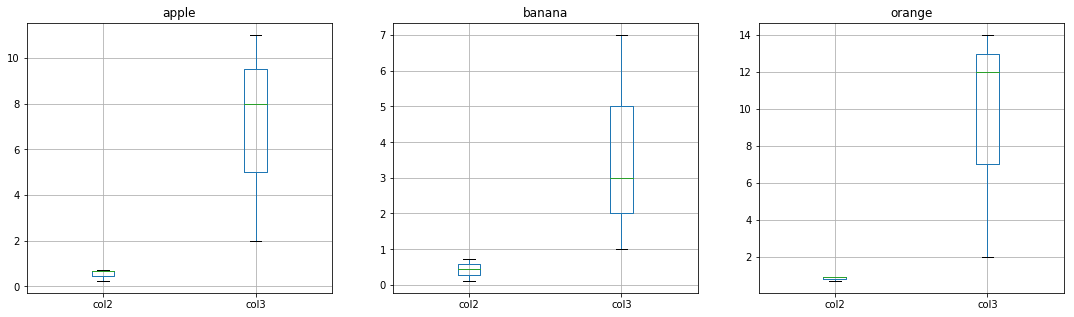

In [492]:
fig, ax = plt.subplots(1,3,figsize=(18, 5))
df_grouped.boxplot(ax=ax)
plt.show()

### 42. get the nth largest value in groups
In df, find the second largest value of 'taste' for 'banana'

In [495]:
df = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                   'taste': np.random.rand(9),
                   'price': np.random.randint(0, 15, 9)})

In [497]:
df

,fruit,price,taste
0,apple,7,0.555616
1,banana,0,0.326040
2,orange,8,0.500622
3,apple,5,0.188271
4,banana,4,0.008895
5,orange,5,0.183134
6,apple,4,0.631862
7,banana,11,0.859641
8,orange,4,0.065966


In [500]:
df.groupby('fruit')['taste'].get_group('banana').sort_values().iloc[-2]

0.32604041304616649

### 43. How to compute grouped mean on pandas dataframe and keep the grouped column as another column (not index)?

In [502]:
df.groupby('fruit')['price'].mean().reset_index()

,fruit,price
0,apple,5.333333
1,banana,5.000000
2,orange,5.666667


In [503]:
df.groupby('fruit', as_index=False)['price'].mean()

,fruit,price
0,apple,5.333333
1,banana,5.000000
2,orange,5.666667


### 44. join two dfs, so they have only the common rows
Join dataframes df1 and df2 by ‘fruit-pazham’ and ‘weight-kilo’.

[merge](https://pandas.pydata.org/pandas-docs/stable/merging.html)
- pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None))
    - on: column or index level names, If not passed and left_index and right_index are False, the intersection of the columns in the DataFrames will be inferred to be the join keys.
    - how: 'left', 'right', 'outer', 'inner', default as 'inner', different from concat ('outer')
    - validate: check duplicates
        - 'one_to_one' or '1:1': check if merge keys are unique in both left and right datasets. 
        - 'one_to_many' or '1:m':
        - 'many_to_one'
        - 'many_to_many'
    - indicator: if True, a Categorical-type column called _merge will be added to the output object that takes on values
        - left_only, right_only, both
    
- Joining / merging on duplicate keys can cause a returned frame that is the multiplication of the row dimensions (m*n), which may result in memory overflow. It is the user’ s responsibility to manage duplicate values in keys before joining large DataFrames.

- DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
    - DataFrame.join() is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame. 
    - For many-to-one joins (where one of the DataFrame’s is already indexed by the join key), using join may be more convenient. 
    - join is more memory efficient/faster when join a singly-indexed df with a level of a multi-indexed df.


In [504]:
# Input
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['high', 'medium', 'low'] * 3,
                    'price': np.random.randint(0, 15, 9)})

df2 = pd.DataFrame({'pazham': ['apple', 'orange', 'pine'] * 2,
                    'kilo': ['high', 'low'] * 3,
                    'price': np.random.randint(0, 15, 6)})

In [510]:
pd.merge(df1, df2, how='inner',left_on=['fruit', 'weight'], right_on=['pazham', 'kilo'], suffixes=['_left', '_right'])

,fruit,price_left,weight,kilo,pazham,price_right
0,apple,14,high,high,apple,9
1,apple,0,high,high,apple,9
2,apple,0,high,high,apple,9
3,orange,8,low,low,orange,1
4,orange,9,low,low,orange,1
5,orange,3,low,low,orange,1


### 45.remove rows from a df that present in another df?
dataframe.isin(values): 
    - values: The result will only be true at a location if all the labels match. 
        - If values is a Series, that’s the index. 
        - If values is a dictionary, the keys must be the column names, which must match. 
        - If values is a DataFrame, then both the index and column labels must match.

In [528]:
# Input
df1 = pd.DataFrame({'fruit': ['apple', 'orange', 'banana'] * 3,
                    'weight': ['high', 'medium', 'low'] * 3,
                    'price': np.arange(9)})

df2 = pd.DataFrame({'fruit': ['apple', 'orange', 'pine'] * 2,
                    'weight': ['high', 'medium'] * 3,
                    'price': np.arange(6)})

In [529]:
df1[~df1.isin(df2).all(axis=1)]

,fruit,price,weight
2,banana,2,low
3,apple,3,high
4,orange,4,medium
5,banana,5,low
6,apple,6,high
7,orange,7,medium
8,banana,8,low


### 46. get the positions where values of two columns match

In [530]:
# Input
df = pd.DataFrame({'fruit1': np.random.choice(['apple', 'orange', 'banana'], 10),
                    'fruit2': np.random.choice(['apple', 'orange', 'banana'], 10)})

# Solution
np.where(df.fruit1 == df.fruit2)

(array([2]),)

In [531]:
np.argwhere(df.fruit1 == df.fruit2)

array([[2]])

### 47.create lags and leads of a column in df

In [532]:
# Input
df = pd.DataFrame(np.random.randint(1, 100, 20).reshape(-1, 4), columns = list('abcd'))

# Solution
df['a_lag1'] = df['a'].shift(1)
df['b_lead1'] = df['b'].shift(-1)
df.head()

,a,b,c,d,a_lag1,b_lead1
0,89,36,71,69,NaN,77.0
1,82,77,55,13,89.0,84.0
2,5,84,38,3,82.0,47.0
3,82,47,75,81,5.0,78.0
4,60,78,72,16,82.0,NaN


### 48.split a text columns 

In [545]:
# Input
df = pd.DataFrame(["STD, City    State",
"33, Kolkata    West Bengal",
"44, Chennai    Tamil Nadu",
"40, Hyderabad    Telengana",
"80, Bangalore    Karnataka"], columns=['row'])

In [555]:
df_split = df.row.str.split(',|    ', expand=True)
df_split.columns = df_split.iloc[0]
df_split.iloc[1:]

,STD,City,State
1,33,Kolkata,West Bengal
2,44,Chennai,Tamil Nadu
3,40,Hyderabad,Telengana
4,80,Bangalore,Karnataka


### 49. For each animal type and each number of visits, find the mean age. 

[pivot_table](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    - index and columns are keys to group, 
        - if an array is passes, it must be the same length as the data
        - pd.Grouper(freq='M', key=date_column_name) for date range
    - margins: add all row/columns
    - aggfunc: can pass in dict as in apply

In [557]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


In [560]:
pd.pivot_table(data= df, index='animal', columns='visits', values='age')

visits,1,2,3
animal,,,
cat,2.5,NaN,2.5
dog,3.0,6.0,NaN
snake,4.5,0.5,NaN


### 50.filter out rows which contain the same integer as the row immediately above?

In [561]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

In [571]:
df[df.A != df.A.shift()]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


### 51.  subtract the row mean from each element in the row

- DataFrame.sub(other, axis='columns', level=None, fill_value=None)
    - series: for series input, axis to mathc series index on
- DataFrame.add

In [572]:
df = pd.DataFrame(np.random.random(size=(5, 3)))

In [575]:
df.sub(df.mean(axis=1), axis=0)

,0,1,2
0,-0.175132,0.105625,0.069507
1,0.045086,0.028447,-0.073533
2,-0.216572,0.261602,-0.045030
3,0.190129,-0.296984,0.106854
4,0.080861,-0.176576,0.095715


In [578]:
# df.mean() get column mean by default, axis=0
# df.sub() has axis=1 by default, could not broadcast as in numpy
df-df.mean(axis=1)

,0,1,2,3,4
0,-0.175132,0.173755,-0.263366,NaN,NaN
1,-0.023045,0.028447,-0.474537,NaN,NaN
2,0.116301,0.662606,-0.045030,NaN,NaN
3,0.184107,-0.234875,-0.232041,NaN,NaN
4,0.158696,-0.030610,-0.159322,NaN,NaN


### 52. Which column of numbers has the smallest sum? 

In [581]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))

In [585]:
df.sum().argmin()

'd'

In [586]:
df.sum().idxmin()

'd'

### 53.how many unique rows?
- DataFrame.duplicated(subset=None, keep='first')
    - keep: {‘first’, ‘last’, False}, False : Mark all duplicates as True.
    - Return boolean Series denoting duplicate rows
- DataFrame.drop_duplicates(subset=None, keep='first')

In [589]:
len(df.drop_duplicates(keep=False))

5

### 54. For each row of the DataFrame, find the column which contains the third NaN value.
You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries in each row are NaN values. 

In [ ]:
(df.isnull().cumsum(axis=1) == 3).idxmax(axis=1)

### 55.For each group, find the sum of the three greatest values

In [590]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

In [593]:
df.groupby('grps')['vals'].apply(lambda x: sum(sorted(x, reverse=True)[:3]))

grps
a    409
b    156
c    345
Name: vals, dtype: int64

In [595]:
df.groupby('grps')['vals'].nlargest(3).sum(level=0)

grps
a    409
b    156
c    345
Name: vals, dtype: int64

In [600]:
# returned data frame has multi-index, sum() will give one value.
df.groupby('grps')['vals'].nlargest(3)

grps    
a     1     345
      7      52
      0      12
b     12     57
      8      54
      4      45
c     10    235
      14     87
      9      23
Name: vals, dtype: int64

### 56. calculate the sum of the corresponding values in column 'B' by intervals in A
A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. (0, 10], (10, 20], ...)

In [ ]:
df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()

### 57. count the difference back to the previous zero
Consider a DataFrame df where there is an integer column 'X':
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.

In [601]:
# input 
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
# expected
[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]

In [618]:
(df['X'] == 0).cumsum()

0    0
1    0
2    1
3    1
4    1
5    1
6    1
7    2
8    2
9    2
Name: X, dtype: int64

In [621]:
df['Y']=df.groupby((df['X'] == 0).cumsum()).cumcount()
df['Y']

0    0
1    1
2    0
3    1
4    2
5    3
6    4
7    0
8    1
9    2
Name: Y, dtype: int64

In [624]:
# still need to offset by one before the first zero
df.Y.iloc[:(df.X == 0).idxmax()] += 1
df.Y

0    1
1    2
2    0
3    1
4    2
5    3
6    4
7    0
8    1
9    2
Name: Y, dtype: int64

### 58.Create a list of the row-column index locations of the 3 largest values.
Consider a DataFrame containing rows and columns of purely numerical data.

[Reshape: pivot/stack/unstack/melt](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)

- dataframe format
    - wide format
    - long/stacked/record format
    
- pivot:
    - reshape data based on column values (stack is closedly related to pivot)
        - DataFrame.pivot(index=None, columns=None, values=None)
        - A ValueError is raised if there are any duplicates.
    - stack/pivot prescribed level of the column labels to index axis
        - DataFrame.stack(level=-1, dropna=True)
        - It is common to have missing values when stacking a dataframe with multi-level columns, as the stacked dataframe typically has more values than the original dataframe. Missing values are filled with NaNs:
    - unstack/pivot prescribed level(s) from index axis onto column axis
        - DataFrame.unstack(level=-1, dropna=True)
        - If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex).
    - generalization of pivot that can handle duplicate values for one index/column pair.
        - DataFrame.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')   
        
        
- melt
    - pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)

In [627]:
# input
df = pd.DataFrame(np.random.randint(100, size=(5, 4)), columns=list('abcd'))

In [643]:
df.stack().sort_values()[-3:].index.tolist()

[(1, 'd'), (0, 'c'), (2, 'a')]

In [645]:
columns = pd.MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                   ('B', 'cat'), ('A', 'dog')],
                                   names=['exp', 'animal'])

index = pd.MultiIndex.from_product([('bar', 'baz', 'foo', 'qux'),
                                   ('one', 'two')],
                                  names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 4), index=index, columns=columns)

In [646]:
df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -0.202240 -0.199278 -0.849245  0.774075
      two     1.121578 -1.156786  1.191924  0.104989
baz   one    -0.137142 -0.625650  0.242262  0.400200
      two     0.875179 -0.679955  1.765754  1.803486
foo   one    -1.485188  1.065611 -1.148928 -0.929595
      two     0.417231  2.216545  1.837273  0.220575
qux   one     2.262780 -1.187895  1.205416 -2.232907
      two    -0.523768  0.897732  0.422710  0.705218

In [651]:
# default axis=0
df.mean()

exp  animal
A    cat       0.291054
B    dog       0.041290
     cat       0.583396
A    dog       0.105755
dtype: float64

In [652]:
df.mean(axis=1)

first  second
bar    one      -0.119172
       two       0.315426
baz    one      -0.030082
       two       0.941116
foo    one      -0.624525
       two       1.172906
qux    one       0.011849
       two       0.375473
dtype: float64

In [654]:
df.mean(axis=1, level=1)

animal             cat       dog
first second                    
bar   one    -0.525743  0.287398
      two     1.156751 -0.525899
baz   one     0.052560 -0.112725
      two     1.320467  0.561766
foo   one    -1.317058  0.068008
      two     1.127252  1.218560
qux   one     1.734098 -1.710401
      two    -0.050529  0.801475

In [661]:
df.groupby(level=1, axis=1).mean()

animal             cat       dog
first second                    
bar   one    -0.525743  0.287398
      two     1.156751 -0.525899
baz   one     0.052560 -0.112725
      two     1.320467  0.561766
foo   one    -1.317058  0.068008
      two     1.127252  1.218560
qux   one     1.734098 -1.710401
      two    -0.050529  0.801475

In [662]:
df.stack().groupby(level=1).mean()

exp,A,B
second,,
one,-0.193752,-0.187214
two,0.590561,0.811900


In [666]:
df.stack().mean(axis=0, level=1)

exp,A,B
second,,
one,-0.193752,-0.187214
two,0.590561,0.811900


### 59.  replace any negative values in 'vals' with the group mean.

In [667]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, -1, 2, 3, 
                                 -2, 1, 7, 3, -3, 8]})

In [670]:
def replace_negative_by_mean(x):
    mask = x < 0
    x[mask] = x[~mask].mean()
    return x
df.groupby('group')['value'].transform(replace_negative_by_mean)
# df.groupby('group')['value'].apply(replace_negative_by_mean)

0     1.0
1     2.0
2     3.0
3     3.6
4     2.0
5     3.0
6     3.6
7     1.0
8     7.0
9     3.0
10    3.0
11    8.0
Name: value, dtype: float64

### 60.Implement a rolling mean over groups with window size 3, which ignores NaN value. 

- DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)
    - window: offset, size of the moving window
    - min_periods: minimum number of observations in window required to have a value, otherwise, NA. Default is the window length.
    - center, set the labels at the center of the window, by default, it is set to the right edge of the window
    - win_type: if noe, all points are evenly weighted.
    - on: column on which to calculate the rolling window.

In [672]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})

In [687]:
gr = df.groupby('group')['value'].rolling(3, min_periods=1)
# first roll is the sum ignore na
# second is the count of non-nan 
(gr.sum()/gr.count()).reset_index(level=0).sort_index()

,group,value
0,a,1.000000
1,a,1.500000
2,b,3.000000
3,b,3.000000
4,a,1.666667
5,b,3.000000
6,b,3.000000
7,b,2.000000
8,a,3.666667
9,b,2.000000


### 61. Timeseries related
#### 61.1 Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series s

In [706]:
idx = pd.date_range('2015-01-01', '2015-12-31', freq='B')
s = pd.Series(np.random.random(len(idx)), index=idx)
s.head()

2015-01-01    0.465851
2015-01-02    0.195997
2015-01-05    0.924761
2015-01-06    0.861962
2015-01-07    0.171027
Freq: B, dtype: float64

#### 61.2 Find the sum of the values in s for every Wednesday

In [707]:
s[s.index.weekday_name=='Wednesday'].sum()

27.063195844740342

#### 61.3 For each calendar month in s, find the mean of values.

In [708]:
s.groupby(s.index.month).mean()

1     0.472400
2     0.485921
3     0.578480
4     0.501136
5     0.427611
6     0.429034
7     0.536037
8     0.543139
9     0.374587
10    0.569888
11    0.526122
12    0.412726
dtype: float64

In [709]:
s.resample('M').mean()

2015-01-31    0.472400
2015-02-28    0.485921
2015-03-31    0.578480
2015-04-30    0.501136
2015-05-31    0.427611
2015-06-30    0.429034
2015-07-31    0.536037
2015-08-31    0.543139
2015-09-30    0.374587
2015-10-31    0.569888
2015-11-30    0.526122
2015-12-31    0.412726
Freq: M, dtype: float64

#### 61.4 For each group of four consecutive calendar months in s, find the date on which the highest value occurred.

In [713]:
s.groupby((s.index.month-1)//4).apply(np.argmax)

0   2015-03-25
1   2015-06-23
2   2015-10-16
dtype: datetime64[ns]

In [715]:
s.groupby((s.index.month-1)//4).idxmax()

0   2015-03-25
1   2015-06-23
2   2015-10-16
dtype: datetime64[ns]

In [716]:
s.groupby(pd.TimeGrouper('4M')).idxmax()

2015-01-31   2015-01-08
2015-05-31   2015-03-25
2015-09-30   2015-06-23
2016-01-31   2015-10-16
Freq: 4M, dtype: datetime64[ns]

#### 61.5 Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [719]:
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

### 62. Cleaning Data
62.1 Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

- DataFrame.interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction='forward', limit_area=None, downcast=None, **kwargs)
    - method: ‘linear’, ‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘barycentric’, ‘krogh’, ‘polynomial’, ‘spline’, ‘piecewise_polynomial’, ‘from_derivatives’, ‘pchip’, ‘akima’
    - limit_area: 
        - None: no restriction
        - inside: only interpolate
        - outside: only extrapolate
       

In [4]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

In [6]:
df['FlightNumber'] = df.FlightNumber.interpolate().astype(int)

62.2 The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [11]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']

62.3 Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [15]:
for col in temp.columns:
    temp[col] = temp[col].str.title()
    # temp[col] = temp[col].str.capitalize()

62.4 Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [16]:
df.drop('From_To', axis=1, inplace=True)
df = pd.concat([temp, df], axis=1)

62.5 In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. '(British Airways. )' should become 'British Airways'.

In [27]:
df.Airline.str.replace('[^a-zA-Z\s]+', '').str.strip()

0                KLM
1         Air France
2    British Airways
3         Air France
4          Swiss Air
Name: Airline, dtype: object

In [31]:
df['Airline'] = df.Airline.str.extract('([a-zA-Z\s]+)', expand=False).str.strip()

62.6  In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [32]:
delays = df['RecentDelays'].apply(pd.Series)

In [34]:
delays.columns = ['delay_{}'.format(i) for i in range(1, delays.shape[1]+1)]

In [35]:
df.drop('RecentDelays', axis=1).join(delays)

,From,To,Airline,FlightNumber,delay_1,delay_2,delay_3
0,London,Paris,KLM,10045,23.0,47.0,NaN
1,Madrid,Milan,Air France,10055,NaN,NaN,NaN
2,London,Stockholm,British Airways,10065,24.0,43.0,87.0
3,Budapest,Paris,Air France,10075,13.0,NaN,NaN
4,Brussels,London,Swiss Air,10085,67.0,32.0,NaN


### 63.[Multi-index](https://pandas.pydata.org/pandas-docs/stable/advanced.html)
- create multi-index
    - MultiIndex.from_arrays(arrays, sortorder=None, names=None)
    - MultiIndex.from_tuples(tuples, sortorder=None, names=None)
    - MultiIndex.from_product(iterables, sortorder=None, names=None)
    - As a convenience, you can pass a list of arrays directly into Series or DataFrame to construct a MultiIndex automatically

- Index.get_level_values(level)
- DataFrame.swaplevel(i=-2, j=-1, axis=0)
- DataFrame.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
- slice(None) to select all the contents of that level
    - use pandas.IndexSlice to facilitate a more natural syntax using :, rather than using slice(None).

63.1 Given the lists letters = ['A', 'B', 'C'] and numbers = list(range(10)), construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series s.

In [42]:
pd.MultiIndex.from_product([['A', 'B', 'C'], np.arange(10)])

MultiIndex(levels=[['A', 'B', 'C'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [49]:
pd.MultiIndex.from_arrays([['A']*10+['B']*10+['C']*10, list(np.arange(10))*3])

MultiIndex(levels=[['A', 'B', 'C'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [50]:
s = pd.Series(np.random.random(30), 
              index=[['A']*10+['B']*10+['C']*10, list(np.arange(10))*3])

In [51]:
s

A  0    0.110336
   1    0.699030
   2    0.885510
   3    0.836725
   4    0.541616
   5    0.419382
   6    0.645317
   7    0.949311
   8    0.146496
   9    0.705777
B  0    0.441883
   1    0.174925
   2    0.342293
   3    0.653481
   4    0.558606
   5    0.159306
   6    0.385447
   7    0.680172
   8    0.544004
   9    0.868925
C  0    0.404924
   1    0.703302
   2    0.171177
   3    0.174664
   4    0.520432
   5    0.662728
   6    0.908109
   7    0.482536
   8    0.878331
   9    0.492797
dtype: float64

63.2  Check the index of s is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [73]:
s.index.is_lexsorted()

True

63.3 Select the labels 1, 3 and 6 from the second level of the MultiIndexed Series.

In [77]:
s.loc[:, [1,3,6]]

A  1    0.699030
   3    0.836725
   6    0.645317
B  1    0.174925
   3    0.653481
   6    0.385447
C  1    0.703302
   3    0.174664
   6    0.908109
dtype: float64

In [79]:
s[s.index.get_level_values(level=1).isin([1,3,6])]

A  1    0.699030
   3    0.836725
   6    0.645317
B  1    0.174925
   3    0.653481
   6    0.385447
C  1    0.703302
   3    0.174664
   6    0.908109
dtype: float64

63.4 Slice the Series s; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [84]:
s.loc[(slice(None, 'B'), slice(5,None)), ]

A  5    0.419382
   6    0.645317
   7    0.949311
   8    0.146496
   9    0.705777
B  5    0.159306
   6    0.385447
   7    0.680172
   8    0.544004
   9    0.868925
dtype: float64

63.5 Sum the values in s for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [87]:
s.sum(level=0)
# s.groupby(level=0).sum()

A    5.939502
B    4.809041
C    5.399001
dtype: float64

64.6 Suppose that sum() (and other methods) did not accept a level keyword argument. How else could you perform the equivalent of s.sum(level=1)?

In [93]:
s.unstack().sum()

0    0.957143
1    1.577257
2    1.398980
3    1.664870
4    1.620654
5    1.241417
6    1.938874
7    2.112019
8    1.568831
9    2.067499
dtype: float64

63.7 Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it

In [100]:
s_swap = s.swaplevel(0,1)
s_swap.head()

0  A    0.110336
1  A    0.699030
2  A    0.885510
3  A    0.836725
4  A    0.541616
dtype: float64

In [101]:
s_swap.index.is_lexsorted()

False

In [103]:
s.swaplevel(0,1).sort_index().head()

0  A    0.110336
   B    0.441883
   C    0.404924
1  A    0.699030
   B    0.174925
dtype: float64

### 64. Minesweeper
- [np.random](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)

64.1 et's suppose we're playing Minesweeper on a 5 by 4 grid. To begin, generate a DataFrame df with two columns, 'x' and 'y' containing every coordinate for this grid. That is, the DataFrame should start:

In [110]:
X = 5
Y = 4
size = X*Y
df = pd.DataFrame({'x':np.arange(size)//Y, 'y':list(np.arange(Y))*X})

64.2 For this DataFrame df, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [111]:
df['mine'] = np.random.binomial(1,0.4,size)

In [133]:
df

,x,y,mine
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,1,0,0
5,1,1,1
6,1,2,0
7,1,3,0
8,2,0,0
9,2,1,0


64.3 Now create a new column for this DataFrame called 'adjacent'. This column should contain the number of mines found on adjacent squares in the grid.

In [136]:
df['adjacent'] = \
    df.merge(df + [ 1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 1, -1, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1, -1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 1,  0, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1,  0, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 0,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 0, -1, 0], on=['x', 'y'], how='left')\
      .iloc[:, 3:].sum(axis=1)

In [140]:
pd.pivot_table(df, values='mine',index='y', columns='x')

x,0,1,2,3,4
y,,,,,
0,0,0,0,0,1
1,0,1,0,1,0
2,0,0,0,1,0
3,0,0,0,0,0


In [143]:
from scipy.signal import convolve2d
mine_grid = df.pivot_table(columns='x', index='y', values='mine')
counts = convolve2d(mine_grid.astype(complex), np.ones((3, 3)), mode='same').real.astype(int)
df['adjacent'] = (counts - mine_grid).values.ravel('F')

64.4 For rows of the DataFrame that contain a mine, set the value in the 'adjacent' column to NaN.

In [145]:
df.loc[df.mine==1, 'adjacent'] = np.nan

Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the x coordinate, rows are the y coordinate.

In [146]:
pd.pivot_table(df, index='y',columns='x', values='adjacent')

x,0,1,2,3,4
y,,,,,
0,1.0,1.0,2.0,2.0,NaN
1,1.0,NaN,3.0,NaN,3.0
2,1.0,1.0,3.0,NaN,2.0
3,0.0,0.0,1.0,1.0,1.0


### 65. plotting

65.1 Columns in your DataFrame can also be used to modify colors and sizes. Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning. Make a plot which incorporates all four features of this DataFrame.

In [148]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

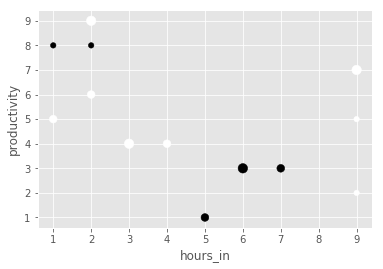

In [152]:
plt.style.use('ggplot')
df.plot.scatter('hours_in', 'productivity', s=df.happiness*30, c=df.caffienated)

65.2 Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

In [153]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

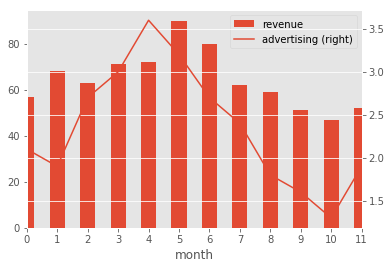

In [155]:
ax = df.plot.bar('month', 'revenue')
df.plot.line('month', 'advertising', ax=ax, secondary_y=True)

In [157]:
# This function is designed to create semi-interesting random stock price data

import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

def plot_candlestick(agg):
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

In [171]:
df = day_stock_data()
df.head()

,time,price
0,2018-08-25 09:30:00,100.000000
1,2018-08-25 09:30:02,99.956770
2,2018-08-25 09:30:03,99.897371
3,2018-08-25 09:30:06,99.865485
4,2018-08-25 09:30:24,99.895395


65.3 Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

In [172]:
df.set_index('time', inplace=True)
# opening, highest, lowest, and closing prices
agg = df.resample('H').ohlc()
agg.columns = agg.columns.droplevel()
agg["color"] = (agg.close > agg.open).map({True:"green",False:"red"})
agg.head()

,open,high,low,close,color
time,,,,,
2018-08-25 09:00:00,100.000000,100.362087,96.553775,96.624257,red
2018-08-25 10:00:00,96.697555,99.118270,96.277118,97.520822,green
2018-08-25 11:00:00,97.605829,98.720726,96.661926,97.004972,red
2018-08-25 12:00:00,96.942201,98.545921,96.587972,97.896353,green
2018-08-25 13:00:00,97.866980,98.312109,96.135135,96.755666,red


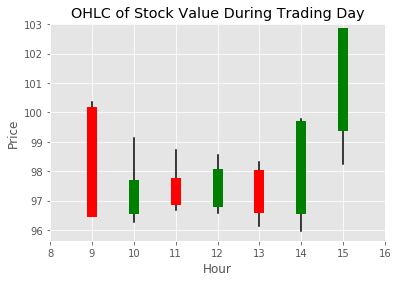

In [173]:
plot_candlestick(agg)